## Q3

In [ ]:
# Q3.1: Find log-likelihood
import numpy as np

D = np.array([1.0, 1.3, 2.2, 2.6, 2.8, 5.0, 7.3, 7.4, 7.5, 7.7])

mu_1, sigma_1, P_C1 = 6.63, 1, 0.5
mu_2, sigma_2, P_C2 = 7.57, 1, 0.5

# Guassian PDF (Lecture 08 page 11)
def Guasian_PDF(mu,sigma,x):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2) 

# log likelihood (L8 Page 21)
log_likelihood = 0

for x in D:
    P1 = P_C1 * Guasian_PDF(mu_1, sigma_1,x)
    P2 = P_C2 * Guasian_PDF(mu_2, sigma_2,x)

    log_likelihood += np.log(P1 + P2)

print(log_likelihood)



In [ ]:
# Q3.2 (Lecture 8 Page 25)
D = np.array([1.0, 1.3, 2.2, 2.6, 2.8, 5.0, 7.3, 7.4, 7.5, 7.7])

mu_1, sigma_1, P_C1 = 6.63, 1, 0.5
mu_2, sigma_2, P_C2 = 7.57, 1, 0.5

# Guassian PDF (Lecture 08 page 11)
def Guasian_PDF(mu,sigma,x):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2) 

# log likelihood (L8 Page 21)
result = []

for x in D:
    P1 = P_C1 * Guasian_PDF(mu_1, sigma_1,x)
    P2 = P_C2 * Guasian_PDF(mu_2, sigma_2,x)

    w_i1 = P1 / (P1 + P2)  # posterior probabilities for cluster 1
    w_i2 = P2 / (P1 + P2)  # posterior probabilities for cluster 2

    result.append((w_i1,w_i2))

print(result)

In [4]:
# Q3.3
import numpy as np

D = np.array([1.0, 1.3, 2.2, 2.6, 2.8, 5.0, 7.3, 7.4, 7.5, 7.7])

# posterior probabilities
result = np.array([
    [0.9968	, 0.0032],
    [0.9957	, 0.0043],
    [0.9901	, 0.0099],
    [0.9857	, 0.0143],
    [0.9827	, 0.0173],
    [0.878	, 0.122],
    [0.4531	, 0.5469],
    [0.43	, 0.57],
    [0.4071	, 0.5929],
    [0.3626	, 0.6374]
])

#  Means
def update_means(D, result):

    resp_sum_1 = np.sum(result[:, 0])
    resp_sum_2 = np.sum(result[:, 1])
    
    mu_1 = np.sum(result[:, 0] * D) / resp_sum_1
    mu_2 = np.sum(result[:, 1] * D) / resp_sum_2
    
    return mu_1, mu_2

#  Variances
def update_variances(D, result, mu_1, mu_2):
    resp_sum_1 = np.sum(result[:, 0])
    resp_sum_2 = np.sum(result[:, 1])
    
    sigma_1_sq = np.sum(result[:, 0] * (D - mu_1)**2) / resp_sum_1
    sigma_2_sq = np.sum(result[:, 1] * (D - mu_2)**2) / resp_sum_2
    
    return sigma_1_sq, sigma_2_sq

# Mixture Weights
def update_mixture_weights(result):
    N = result.shape[0]
    P_C1 = np.sum(result[:, 0]) / N
    P_C2 = np.sum(result[:, 1]) / N
    
    return P_C1, P_C2

## Q4

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2] 
y = iris.target      

# Q4.1
# plot
for target, color, label in zip(np.unique(y), ['r', 'g', 'b'], iris.target_names):
    plt.scatter(X[y == target, 1], X[y == target, 0], c=color, label=label)
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title('Sepal Width vs. Sepal Length')
plt.legend()
plt.show()

In [ ]:
#Q4.2a
from sklearn.cluster import KMeans

# 3 clusters, and random_state  = 0
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

plt.scatter(X[:, 1], X[:, 0], c=kmeans_labels)
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title('K-Means Clustering - Sepal Measurements')
plt.show()

#Q4.2b
from sklearn.metrics import silhouette_score

silhouette_index = silhouette_score(X, kmeans_labels)
print("Silhouette Index: ",silhouette_index)


# Q4.2c
'''
According to the class label plot (P1), we can see some green dots and blue dots 
are mixed together, or overlapping. After we do cluster assignment (P2), we kinda
of split the overlapping situation better. The samples are now clearly separated 
into 3 different sectors. 

Silhouette index is a value between -1 and 1. Negative values generally indicate that a 
sample has been assigned to the wrong cluster. Values near 0 indicate overlapping 
clusters. 0.445 means moderate clustering structure. So yes, as we can see from P1, we 
can tell there are some mixture/overlapping in vertisicolor and virginica.

'''

In [ ]:
# Q4.3
iris = load_iris()
X = iris.data[:, :2] 
y = iris.target 

silhouette_score_set = []

for k in range(2,51):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans_labels = kmeans.fit_predict(X)


    silhouette_index = silhouette_score(X, kmeans_labels)
    souetteilh_score_set.append((k,float(silhouette_index)))

# print(silhouette_score_set)

k_values = [item[0] for item in silhouette_score_set]
silhouette_scores = [item[1] for item in silhouette_score_set]


plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')

plt.show()


'''
Yes, K = 2 is better than K = 3. Because from the P1, based sepal measurements alone,
the data naturally forms two clusters, which is why we saw some overlapping in vertisicolor and virginica
'''

In [ ]:
# Q4.4

from sklearn_extra.cluster import KMedoids

# Apply K-Medoids clustering
kmedoids = KMedoids(n_clusters=3, random_state=0)
kmedoids_labels = kmedoids.fit_predict(X)

# Plot the clustering results
# plt.figure(figsize=(8, 6))
plt.scatter(X[:, 1], X[:, 0], c=kmedoids_labels)
plt.ylabel('Sepal Length (cm)')
plt.xlabel('Sepal Width (cm)')
plt.title('K-Medoids Clustering (k=3) - Sepal Measurements')
plt.show()

'''
K-mediod looks almost the same as k-means.
KMedoids is related to the KMeans algorithm. While KMeans 
tries to minimize the within cluster sum-of-squares, KMedoids
tries to minimize the sum of distances between each point and the medoid of its cluster. 
'''

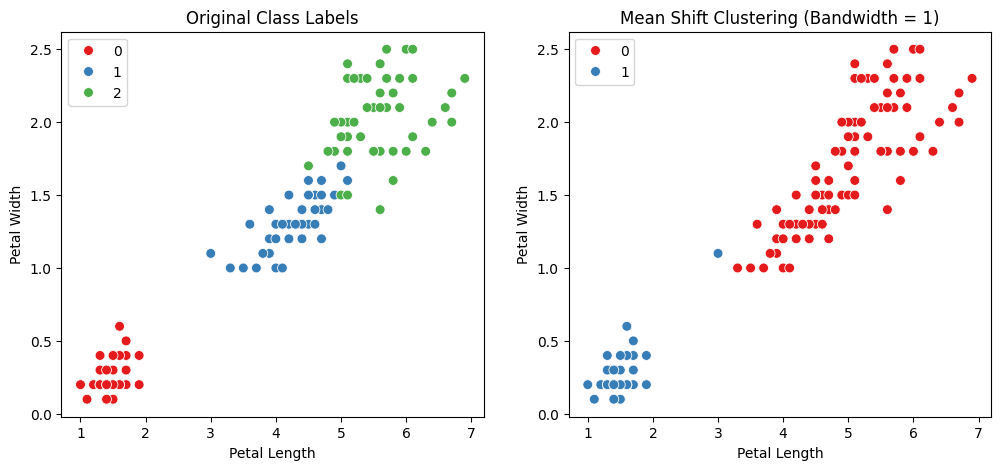

Silhouette Score for Bandwidth = 1: 0.77
Estimated Bandwidth: 0.51


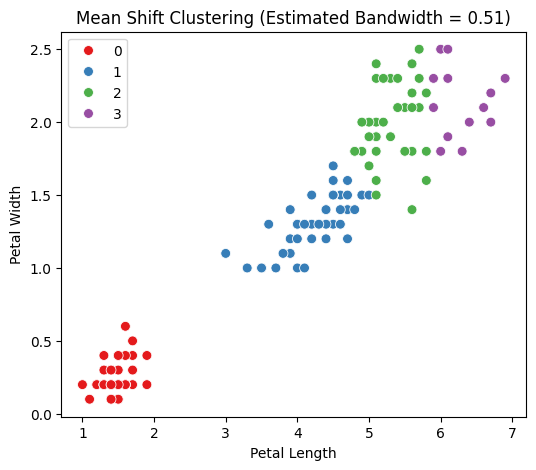

Silhouette Score for Estimated Bandwidth = 0.51: 0.61
The fixed bandwidth of 1 leads to better clustering based on the Silhouette Score.


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = datasets.load_iris()
data = iris.data[:, [2, 3]]  # Select petal length and petal width
labels = iris.target

# Part 1: Mean Shift clustering with bandwidth = 1
# Initialize MeanShift with a fixed bandwidth
bandwidth_1 = 1
mean_shift_1 = MeanShift(bandwidth=bandwidth_1)
mean_shift_1.fit(data)
cluster_labels_1 = mean_shift_1.labels_

# Plotting original class labels
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette='Set1', s=50)
plt.title('Original Class Labels')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Plotting cluster labels for bandwidth = 1
plt.subplot(1, 2, 2)
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=cluster_labels_1, palette='Set1', s=50)
plt.title('Mean Shift Clustering (Bandwidth = 1)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

# Calculate and report the Silhouette index
silhouette_1 = silhouette_score(data, cluster_labels_1)
print(f'Silhouette Score for Bandwidth = 1: {silhouette_1:.2f}')

# Part 2: Mean Shift with estimated bandwidth
# Estimate bandwidth using Scikit-learn's function
estimated_bandwidth = estimate_bandwidth(data, quantile=0.2)
print(f'Estimated Bandwidth: {estimated_bandwidth:.2f}')

# Apply Mean Shift clustering with the estimated bandwidth
mean_shift_estimated = MeanShift(bandwidth=estimated_bandwidth)
mean_shift_estimated.fit(data)
cluster_labels_estimated = mean_shift_estimated.labels_

# Plotting cluster labels for estimated bandwidth
plt.figure(figsize=(6, 5))
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=cluster_labels_estimated, palette='Set1', s=50)
plt.title(f'Mean Shift Clustering (Estimated Bandwidth = {estimated_bandwidth:.2f})')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

# Calculate and report the Silhouette index for estimated bandwidth
silhouette_estimated = silhouette_score(data, cluster_labels_estimated)
print(f'Silhouette Score for Estimated Bandwidth = {estimated_bandwidth:.2f}: {silhouette_estimated:.2f}')

# Determine which bandwidth leads to optimal clustering
if silhouette_estimated > silhouette_1:
    print("The estimated bandwidth leads to better clustering based on the Silhouette Score.")
else:
    print("The fixed bandwidth of 1 leads to better clustering based on the Silhouette Score.")
